In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import string
import re
from os import listdir
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.utils import plot_model
from keras.models import Sequential
from keras.layers import Dense, Flatten, Embedding
import numpy as np
import nltk
from keras.layers import Conv1D, MaxPooling1D
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
# load doc into memory
def load_doc(filename):
  # open the file as read only
  file = open(filename, 'r' )
  # read all text
  text = file.read()
  # close the file
  file.close()
  return text

In [7]:
text = load_doc('drive/MyDrive/review_polarity
/txt_sentoken/pos/cv026_29325.txt')

In [8]:
text

'for those of us who weren\'t yet born when the 1960\'s rock \'n\' rolled around , monterey pop affords an affectionate glimpse of the music that influenced our parents to be hippies . \nfrom otis redding to jimi hendrix , janis joplin to the mamas and the papas , and jefferson airplane to the who , this documentary is jam-packed with contagious energy . \nbut i give fair warning that i will reveal the ending , which does not do the rest of the film the justice it deserves . \nshot in 1969 at an outdoor concert that precluded woodstock , the film defies the stereotype of the general population at the time . \nsure , some have painted their faces and smoke joints , but d . a . \npennebaker ( the war room , moon over broadway ) surprisingly chooses to show a broad spectrum of the audience . \nno matter who is watching , it all comes back to the talented musicians that stir your soul . \nthe excitement starts before the music even begins . \na young girl is cleaning thousands of seats and

In [10]:
# turn a doc into clean tokens
def clean_doc(doc):
  # split into tokens by white space
  tokens = doc.split()
  # prepare regex for char filtering
  re_punc = re.compile( '[%s]' % re.escape(string.punctuation))
  # remove punctuation from each word
  tokens = [re_punc.sub( '' , w) for w in tokens]
  # remove remaining tokens that are not alphabetic
  tokens = [word for word in tokens if word.isalpha()]
  # filter out stop words
  stop_words = set(stopwords.words( 'english' ))
  tokens = [w for w in tokens if not w in stop_words]
  # filter out short tokens
  tokens = [word for word in tokens if len(word) > 1]
  return tokens

In [11]:
clean_doc(text)

['us',
 'werent',
 'yet',
 'born',
 'rock',
 'rolled',
 'around',
 'monterey',
 'pop',
 'affords',
 'affectionate',
 'glimpse',
 'music',
 'influenced',
 'parents',
 'hippies',
 'otis',
 'redding',
 'jimi',
 'hendrix',
 'janis',
 'joplin',
 'mamas',
 'papas',
 'jefferson',
 'airplane',
 'documentary',
 'jampacked',
 'contagious',
 'energy',
 'give',
 'fair',
 'warning',
 'reveal',
 'ending',
 'rest',
 'film',
 'justice',
 'deserves',
 'shot',
 'outdoor',
 'concert',
 'precluded',
 'woodstock',
 'film',
 'defies',
 'stereotype',
 'general',
 'population',
 'time',
 'sure',
 'painted',
 'faces',
 'smoke',
 'joints',
 'pennebaker',
 'war',
 'room',
 'moon',
 'broadway',
 'surprisingly',
 'chooses',
 'show',
 'broad',
 'spectrum',
 'audience',
 'matter',
 'watching',
 'comes',
 'back',
 'talented',
 'musicians',
 'stir',
 'soul',
 'excitement',
 'starts',
 'music',
 'even',
 'begins',
 'young',
 'girl',
 'cleaning',
 'thousands',
 'seats',
 'asked',
 'interviewer',
 'replies',
 'feels',
 '

In [12]:
# load doc, clean and return line of tokens
def doc_to_line(filename, vocab):
  # load the doc
  doc = load_doc(filename)
  # clean doc
  tokens = clean_doc(doc)
  # filter by vocab
  tokens = [w for w in tokens if w in vocab]
  return ' ' .join(tokens)

In [13]:
vocab = open('vocab.txt')
vocab = vocab.read().split()

In [14]:
text = doc_to_line('drive/MyDrive/review_polarity/txt_sentoken/pos/cv026_29325.txt',
                   vocab)

In [15]:
text

'us werent yet born rock rolled around monterey pop affectionate glimpse music influenced parents hippies otis redding jimi hendrix janis joplin mamas papas jefferson airplane documentary jampacked contagious energy give fair warning reveal ending rest film justice deserves shot outdoor concert film defies stereotype general population time sure painted faces smoke joints war room moon broadway surprisingly chooses show broad spectrum audience matter watching comes back talented musicians stir soul excitement starts music even begins young girl cleaning thousands seats asked interviewer replies feels lucky moments organized craziness john phillips leader mamas papas one concert tries get touch one band tuning member remarks finally decent sound system tell watching first moments show isnt vanity playing music love appreciation street interaction audience performer continues throughout film becomes infectious audience impossible tear eyes away janis joplin belts ballad love ball chain l

In [ ]:
# load all docs in a directory
def process_train(directory, vocab):
  documents = list()
  for filename in listdir(directory):
    if not filename.startswith( 'cv9' ):
      path = directory + '/' + filename
      doc = load_doc(path)
      tokens = clean_doc(doc, vocab)
      documents.append(tokens)
  return documents

def process_test(directory, vocab):
  documents = list()
  for filename in listdir(directory):
    if filename.startswith( 'cv9' ):
      path = directory + '/' + filename
      doc = load_doc(path)
      tokens = clean_doc(doc, vocab)
      documents.append(tokens)
  return documents

In [ ]:
# load all docs in a directory
def process_docs(directory, vocab, is_train):
  documents = list()
  # walk through all files in the folder
  for filename in listdir(directory):
    # skip any reviews in the test set
    if is_train and filename.startswith( 'cv9' ):
      continue
    if not is_train and not filename.startswith( 'cv9' ):
      continue
    # create the full path of the file to open
    path = directory + '/' + filename
    # load the doc
    doc = load_doc(path)
    # clean doc
    tokens = clean_doc(doc)
    # add to list
    documents.append(tokens)
  return documents

In [ ]:
lines = process_docs('drive/MyDrive/review_polarity/txt_sentoken/pos',
                     vocab, False)

In [ ]:
len(lines)

100

In [ ]:
# load and clean a dataset
def load_clean_dataset(vocab, is_train):
  # load documents
  neg = process_docs('drive/MyDrive/review_polarity/txt_sentoken/neg', vocab, is_train)
  pos = process_docs('drive/MyDrive/review_polarity/txt_sentoken/pos', vocab, is_train)
  docs = neg + pos
  # prepare labels
  labels = [0 for _ in range(len(neg))] + [1 for _ in range(len(pos))]
  return docs, labels

In [ ]:
train, train_labels = load_clean_dataset(vocab, True)
test, test_labels = load_clean_dataset(vocab, False)

In [ ]:
len(train), len(test)

(1800, 200)

In [ ]:
len(l)

2000

In [ ]:
from collections import Counter
Counter(l)

Counter({0: 1000, 1: 1000})

Build the DNN model

In [ ]:
# define the model
def define_model(n_words):
  # define network
  model = Sequential()
  model.add(Dense(50, input_shape=(n_words,), activation= 'relu' ))
  model.add(Dense(1, activation= 'sigmoid' ))
  # compile network
  model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' ,
                metrics=[ 'accuracy' ])
  # summarize defined model
  model.summary()
  plot_model(model, to_file= 'model.png' , show_shapes=True)
  return model

In [ ]:
# fit a tokenizer
def create_tokenizer(lines):
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(lines)
  return tokenizer

In [ ]:
# create the tokenizer
tokenizer = create_tokenizer(d)

In [ ]:
# encode data
x_train = tokenizer.texts_to_matrix(d, mode= 'binary' )

In [ ]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [ ]:
x_train.shape

(2000, 25768)

In [ ]:
tokenizer.word_docs

defaultdict(int,
            {'officer': 96,
             'little': 916,
             'wig': 18,
             'goers': 7,
             'designer': 34,
             'overthetop': 50,
             'frances': 18,
             'successful': 164,
             'shaken': 9,
             'always': 434,
             'however': 653,
             'winds': 31,
             'comes': 581,
             'glenn': 38,
             'ben': 103,
             'eric': 48,
             'years': 677,
             'tape': 35,
             'besides': 61,
             'pierre': 6,
             'antics': 39,
             'heretofore': 6,
             'half': 295,
             'long': 588,
             'le': 5,
             'doors': 37,
             'savvy': 10,
             'open': 133,
             'disney': 77,
             'course': 495,
             'making': 462,
             'holiday': 37,
             'lots': 120,
             'kevin': 169,
             'split': 30,
             'heroes': 79,
             '

In [ ]:
# define network
n_words = x_train.shape[1]
model = define_model(n_words)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 50)                1288450   
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 1,288,501
Trainable params: 1,288,501
Non-trainable params: 0
_________________________________________________________________


Train the model

In [ ]:
# fit network
model.fit(x_train, np.array(l), epochs=10, batch_size=10)

Epoch 1/10
200/200 [==============================] - 5s 18ms/step - loss: 0.4138 - accuracy: 0.8195
Epoch 2/10
200/200 [==============================] - 4s 19ms/step - loss: 0.0277 - accuracy: 0.9970
Epoch 3/10
200/200 [==============================] - 4s 20ms/step - loss: 0.0053 - accuracy: 1.0000
Epoch 4/10
200/200 [==============================] - 4s 18ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 5/10
200/200 [==============================] - 3s 17ms/step - loss: 8.0094e-04 - accuracy: 1.0000
Epoch 6/10
200/200 [==============================] - 4s 21ms/step - loss: 4.5061e-04 - accuracy: 1.0000
Epoch 7/10
200/200 [==============================] - 4s 20ms/step - loss: 2.8474e-04 - accuracy: 1.0000
Epoch 8/10
200/200 [==============================] - 4s 18ms/step - loss: 1.9553e-04 - accuracy: 1.0000
Epoch 9/10
200/200 [==============================] - 4s 18ms/step - loss: 1.4216e-04 - accuracy: 1.0000
Epoch 10/10
200/200 [==============================] - 4s 22ms/step - l

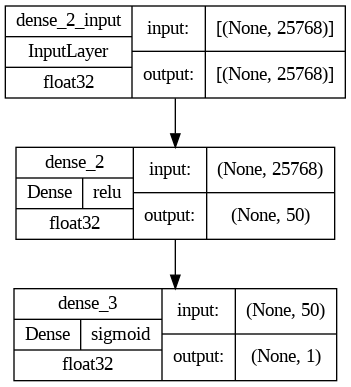

In [ ]:
plot_model(model, show_dtype=True, show_layer_activations=True,
           show_shapes=True, show_layer_names=True )

In [ ]:
# classify a review as negative or positive
def predict_sentiment(review):
  # clean
  tokens = clean_doc(review)
  # filter by vocab
  tokens = [w for w in tokens if w in vocab]
  # convert to line
  line = ' ' .join(tokens)
  # encode
  encoded = tokenizer.texts_to_matrix([line], mode= 'binary' )
  # predict sentiment
  yhat = model.predict(encoded, verbose=0)
  # retrieve predicted percentage and label
  percent_pos = yhat[0,0]
  if round(percent_pos) == 0:
    return (1-percent_pos), 'NEGATIVE'
  return percent_pos, 'POSITIVE'

In [ ]:
# test positive text
text = ' Best movie ever! It was great, I will definitely recommend it. '
percent, sentiment = predict_sentiment(text)
print( ' Review: [%s]\nSentiment: %s (%.3f%%) ' % (text, sentiment, percent*100))

 Review: [ Best movie ever! It was great, I will definitely recommend it. ]
Sentiment: POSITIVE (62.977%) 


In [ ]:
# test negative text
text = ' This is a bad movie. '
percent, sentiment = predict_sentiment(text)
print( ' Review: [%s]\nSentiment: %s (%.3f%%) ' % (text, sentiment, percent*100))

 Review: [ This is a bad movie. ]
Sentiment: NEGATIVE (66.968%) 
